In [1]:
#Encore filtrer classe 
#Faire simu avec les x et test
#Refaire le code un peu propre
#Enregistrer les meilleurs simus de neurones

#Intégrer ça dans le truc automatique

#Essayer de passer par une boucle où supprime les images au fur et à mesure
#/Changer liste_name_test pour éviter les doublons et que les images s'ouvrent ou s'enregistren plusieurs fois.

#Si on fait une boucle il faut tout casser


##Rajouter les fp



import ast
import os
from os import chdir
from os.path import basename, join
import cv2
from imutils import grab_contours
import pandas as pd
import numpy as np
import gc
import time
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import tensorflow


from keras.models import Sequential
from keras.layers import Dense, Activation,GlobalAveragePooling2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Model
import cv2

from numpy import save
from numpy import load

from sklearn import metrics

import matplotlib.pyplot as plt
import pickle

Using TensorFlow backend.


In [2]:
liste_animals=["autre","chevreuil","corneille","faisan","lapin","pigeon"]

In [3]:
#Il faut rajouter le chemin cad




def nn(dropout_rate):    
    
    lenet = Sequential()

    conv_1 = Conv2D(filters = 30,                     # Nombre de filtres
                kernel_size = (5, 5),            # Dimensions du noyau
                padding = 'valid',               # Mode de Dépassement
                input_shape = (28, 28, 4),       # Dimensions de l'image en entrée
                activation = 'relu')             # Fonction d'activation

    max_pool_1 = MaxPooling2D(pool_size = (2, 2))

    conv_2 = Conv2D(filters = 16,                    
                kernel_size = (3, 3),          
                padding = 'valid',             
                activation = 'relu')

    max_pool_2 = MaxPooling2D(pool_size = (2, 2))

    flatten = Flatten()

    dropout = Dropout(rate = dropout_rate)

    dense_1 = Dense(units = 128,
                activation = 'relu')

    dense_2 = Dense(units = 6,
                activation = 'softmax')

    lenet.add(conv_1)
    lenet.add(max_pool_1)
    lenet.add(conv_2)
    lenet.add(max_pool_2)
    lenet.add(dropout)
    lenet.add(flatten)
    lenet.add(dense_1)
    lenet.add(dense_2)



    
    
    
    lenet.compile(loss='sparse_categorical_crossentropy',  # fonction de perte
              optimizer='adam',                 # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation
    
    return lenet

In [5]:
path_to_save='/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/4D_Pictures/Alex_db/HSV_Pictures/'
>>> with open(path_to_save+"Y_test_Alex_db.txt", "rb") as fp:   # Unpickling
...   Y_test = pickle.load(fp)

>>> with open(path_to_save+"Y_train_Alex_db.txt", "rb") as fp:   # Unpickling
...   Y_train = pickle.load(fp)


X_test=np.load('/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/4D_Pictures/Alex_db/HSV_Pictures/X_test_HSV.dat')
X_train=np.load('/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/4D_Pictures/Alex_db/HSV_Pictures/X_train_HSV.dat')

In [14]:
fp_path="/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/4D_Pictures/FP/Neurone_name/dossier0/"

#liste_fp=["image_2019-04-18_18-40-08__fp.txt","image_2019-04-18_18-49-53__fp.txt"]
liste_fp=os.listdir(fp_path)
liste=[]
for fp in liste_fp:
    with open(fp_path+fp, "rb") as fp:   # Unpickling
        liste1 = pickle.load(fp)
    liste=liste+liste1


array=np.array(liste)

In [56]:
X_train_new=np.concatenate((array, X_train), axis=0)
liste_fp = [0] * len(array)
Y_train_new=liste_fp+Y_train


## 1 er modèle avec FP

              precision    recall  f1-score   support

           0    0.99775   0.99289   0.99531     15183
           1    0.83178   0.94681   0.88557        94
           2    0.96947   0.96334   0.96639       791
           3    0.88417   0.96624   0.92339       237
           4    0.80882   0.93220   0.86614       118
           5    0.91018   0.96000   0.93443       475

    accuracy                        0.98953     16898
   macro avg    0.90036   0.96025   0.92854     16898
weighted avg    0.99013   0.98953   0.98973     16898



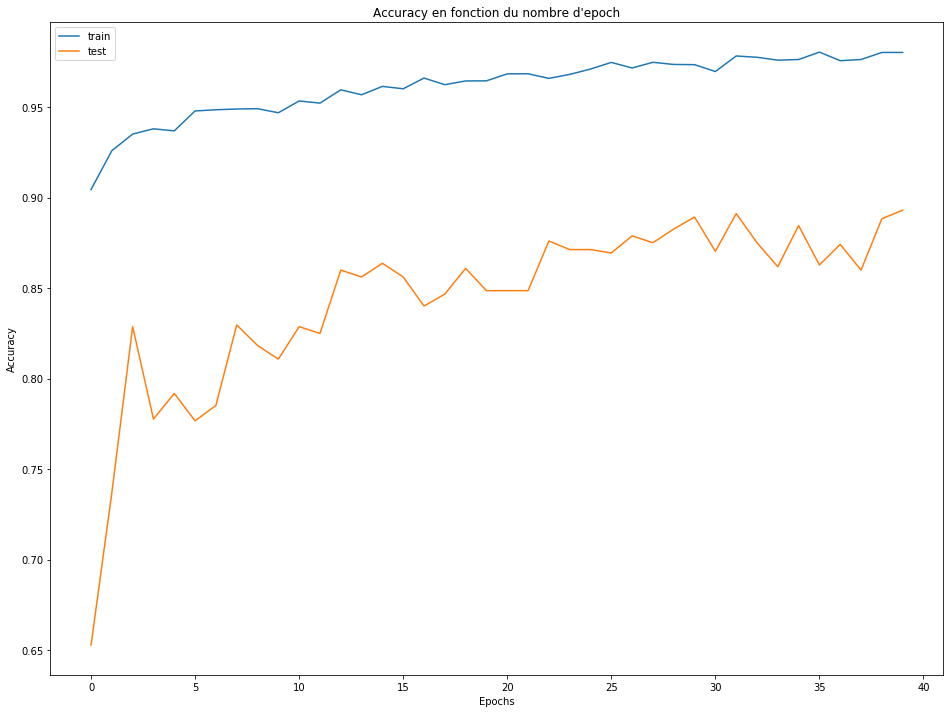

In [59]:
lenet=nn(0.1)
#seed(1)
tensorflow.random.set_seed(2)
#history=lenet.fit(X_train,Y_train,epochs=2,verbose=1)
history=lenet.fit(X_train_new,Y_train_new,validation_data=(X_test, Y_test),  epochs=40,verbose=0)


plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();


Y_predict=lenet.predict(X_train_new).argmax(axis=1)
print(metrics.classification_report(Y_predict,Y_train_new,digits=5))


lenet.save('/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/Models/4Chanels_6Classes/40ep_0.1dpt_GBR__6CL_4CH_smal_fp')


## 100 ep fp

              precision    recall  f1-score   support

           0    0.99874   0.98964   0.99417     15248
           1    0.90654   0.93269   0.91943       104
           2    0.91603   0.99174   0.95238       726
           3    0.86486   0.96137   0.91057       233
           4    0.84559   0.96639   0.90196       119
           5    0.86228   0.92308   0.89164       468

    accuracy                        0.98698     16898
   macro avg    0.89901   0.96082   0.92836     16898
weighted avg    0.98792   0.98698   0.98727     16898



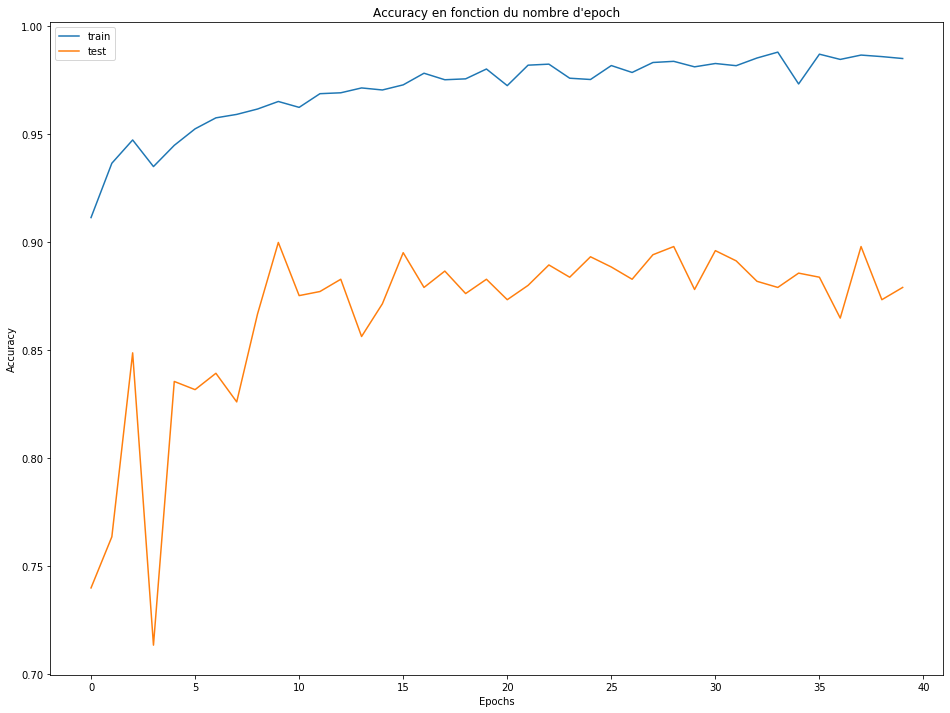

In [60]:
lenet=nn(0.1)
#seed(1)
tensorflow.random.set_seed(2)
#history=lenet.fit(X_train,Y_train,epochs=2,verbose=1)
history=lenet.fit(X_train_new,Y_train_new,validation_data=(X_test, Y_test),  epochs=40,verbose=0)


plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();


Y_predict=lenet.predict(X_train_new).argmax(axis=1)
print(metrics.classification_report(Y_predict,Y_train_new,digits=5))





/home/marcpozzo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           0    0.98557   0.96413   0.97473     15445
           1    0.00000   0.00000   0.00000         0
           2    0.87659   0.67815   0.76471      1016
           3    0.21236   0.72368   0.32836        76
           4    0.06618   0.81818   0.12245        11
           5    0.43513   0.62286   0.51234       350

    accuracy                        0.93869     16898
   macro avg    0.42930   0.63450   0.45043     16898
weighted avg    0.96354   0.93869   0.94907     16898



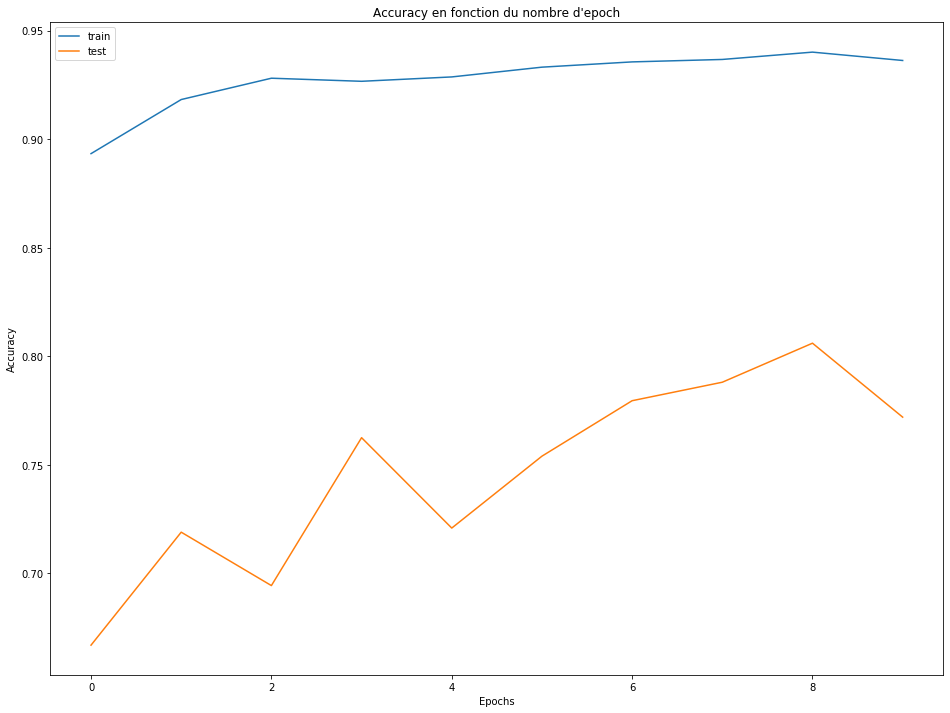

In [62]:
lenet=nn(0.1)
#seed(1)
tensorflow.random.set_seed(2)
#history=lenet.fit(X_train,Y_train,epochs=2,verbose=1)
history=lenet.fit(X_train_new,Y_train_new,validation_data=(X_test, Y_test),  epochs=10,verbose=0)


plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();


Y_predict=lenet.predict(X_train_new).argmax(axis=1)
print(metrics.classification_report(Y_predict,Y_train_new,digits=5))


lenet.save('/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/Models/4Chanels_6Classes/10ep_0.1dpt_GBR__6CL_4CH_smal_fp')


              precision    recall  f1-score   support

           0    0.99504   0.98358   0.98927     15285
           1    0.22430   0.92308   0.36090        26
           2    0.88168   0.93522   0.90766       741
           3    0.55212   0.94079   0.69586       152
           4    0.55882   0.76000   0.64407       100
           5    0.93613   0.78956   0.85662       594

    accuracy                        0.97284     16898
   macro avg    0.69135   0.88871   0.74240     16898
weighted avg    0.98024   0.97284   0.97538     16898



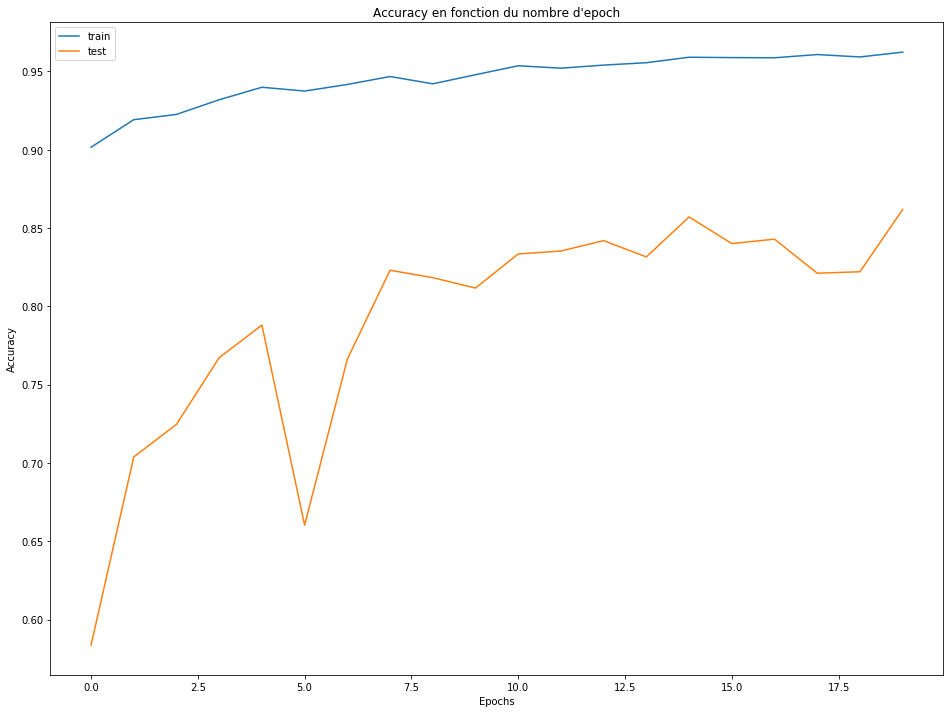

In [63]:
lenet=nn(0.1)
#seed(1)
tensorflow.random.set_seed(2)
#history=lenet.fit(X_train,Y_train,epochs=2,verbose=1)
history=lenet.fit(X_train_new,Y_train_new,validation_data=(X_test, Y_test),  epochs=20,verbose=0)


plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();


Y_predict=lenet.predict(X_train_new).argmax(axis=1)
print(metrics.classification_report(Y_predict,Y_train_new,digits=5))


lenet.save('/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/Models/4Chanels_6Classes/20ep_0.1dpt_GBR__6CL_4CH_smal_fp')


              precision    recall  f1-score   support

           0    0.99676   0.98509   0.99089     15288
           1    0.49533   0.98148   0.65839        54
           2    0.93003   0.95182   0.94080       768
           3    0.81853   0.87243   0.84462       243
           4    0.60294   0.90110   0.72247        91
           5    0.85429   0.94273   0.89634       454

    accuracy                        0.98035     16898
   macro avg    0.78298   0.93911   0.84225     16898
weighted avg    0.98361   0.98035   0.98146     16898



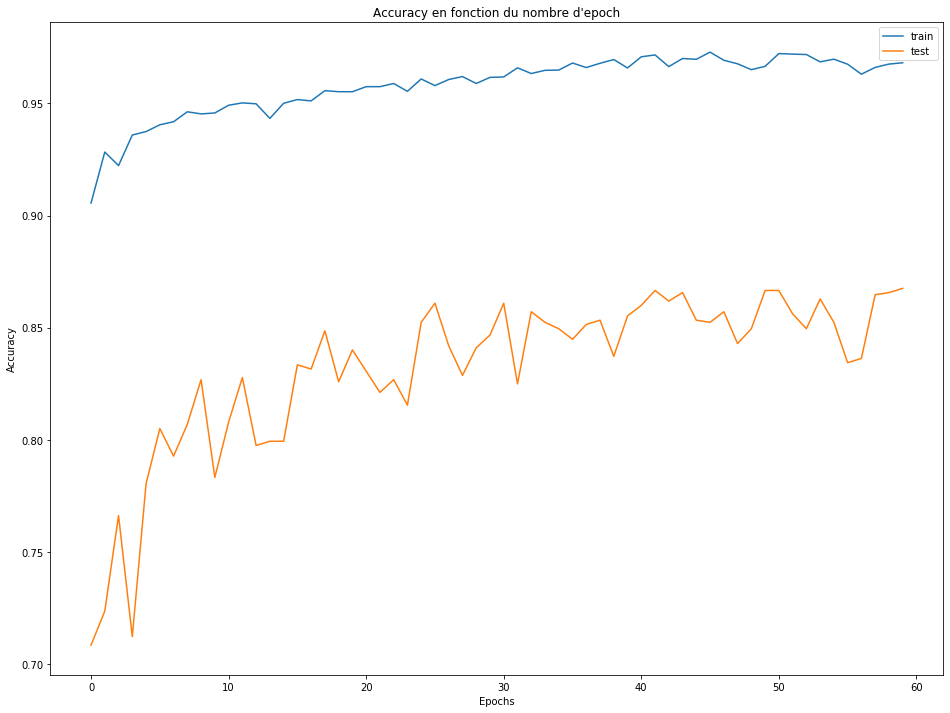

In [64]:
lenet=nn(0.1)
#seed(1)
tensorflow.random.set_seed(2)
#history=lenet.fit(X_train,Y_train,epochs=2,verbose=1)
history=lenet.fit(X_train_new,Y_train_new,validation_data=(X_test, Y_test),  epochs=60,verbose=0)


plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();


Y_predict=lenet.predict(X_train_new).argmax(axis=1)
print(metrics.classification_report(Y_predict,Y_train_new,digits=5))


lenet.save('/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/Models/4Chanels_6Classes/60ep_0.1dpt_GBR__6CL_4CH_smal_fp')


              precision    recall  f1-score   support

           0    0.99404   0.99194   0.99299     15141
           1    0.95327   0.69388   0.80315       147
           2    0.95674   0.92497   0.94059       813
           3    0.79537   0.96714   0.87288       213
           4    0.72059   0.92453   0.80992       106
           5    0.83433   0.87448   0.85393       478

    accuracy                        0.98207     16898
   macro avg    0.87572   0.89616   0.87891     16898
weighted avg    0.98316   0.98207   0.98222     16898



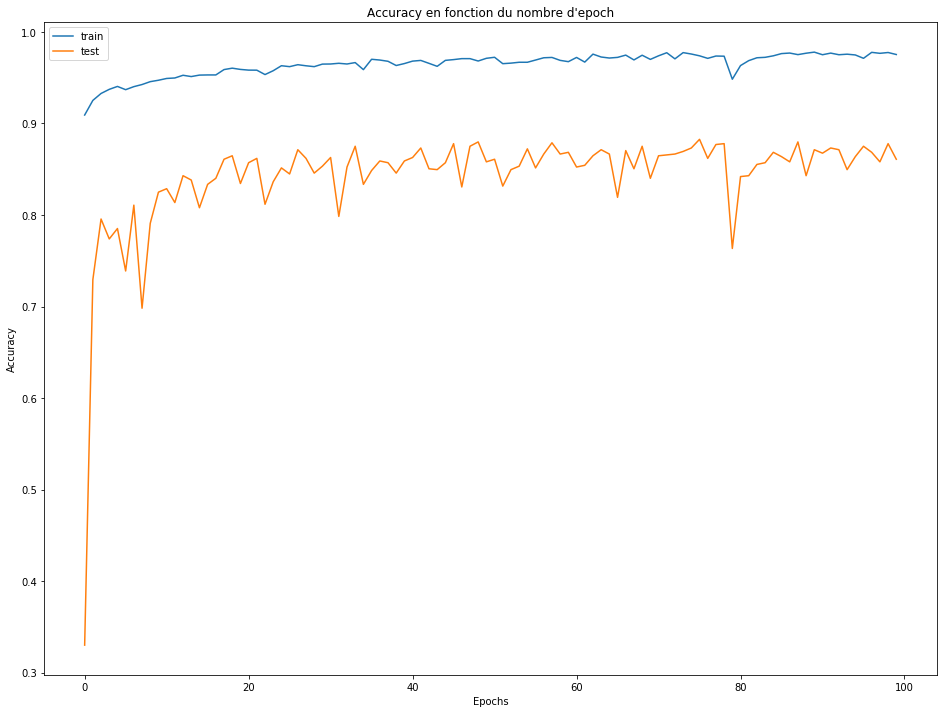

In [65]:
lenet=nn(0.1)
#seed(1)
tensorflow.random.set_seed(2)
#history=lenet.fit(X_train,Y_train,epochs=2,verbose=1)
history=lenet.fit(X_train_new,Y_train_new,validation_data=(X_test, Y_test),  epochs=100,verbose=0)


plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();


Y_predict=lenet.predict(X_train_new).argmax(axis=1)
print(metrics.classification_report(Y_predict,Y_train_new,digits=5))


lenet.save('/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/Models/4Chanels_6Classes/100ep_0.1dpt_GBR__6CL_4CH_smal_fp')


/home/marcpozzo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           0    1.00000   0.89413   0.94411     16898
           1    0.00000   0.00000   0.00000         0
           2    0.00000   0.00000   0.00000         0
           3    0.00000   0.00000   0.00000         0
           4    0.00000   0.00000   0.00000         0
           5    0.00000   0.00000   0.00000         0

    accuracy                        0.89413     16898
   macro avg    0.16667   0.14902   0.15735     16898
weighted avg    1.00000   0.89413   0.94411     16898



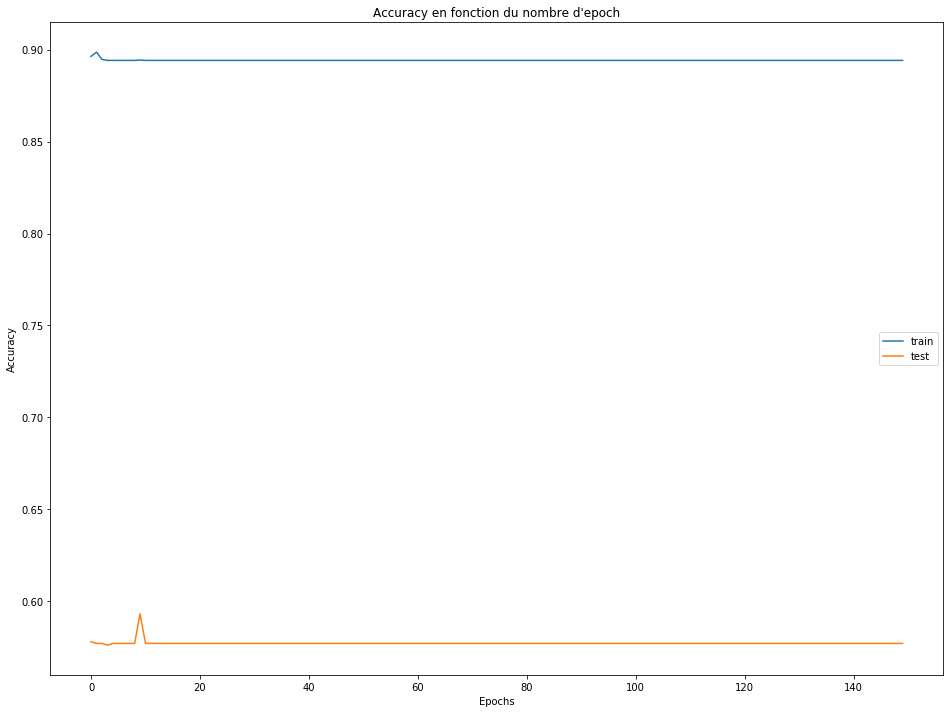

In [66]:
lenet=nn(0.1)
#seed(1)
tensorflow.random.set_seed(2)
#history=lenet.fit(X_train,Y_train,epochs=2,verbose=1)
history=lenet.fit(X_train_new,Y_train_new,validation_data=(X_test, Y_test),  epochs=150,verbose=0)


plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();


Y_predict=lenet.predict(X_train_new).argmax(axis=1)
print(metrics.classification_report(Y_predict,Y_train_new,digits=5))


lenet.save('/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/Models/4Chanels_6Classes/150ep_0.1dpt_GBR__6CL_4CH_smal_fp')


## A partir de là, brouillon

In [40]:
Y_predict=lenet.predict(X_test).argmax(axis=1)
print(metrics.classification_report(Y_predict,Y_test,digits=5))

Y_predict=lenet.predict(X_train).argmax(axis=1)
print(metrics.classification_report(Y_predict,Y_train,digits=5))

              precision    recall  f1-score   support

           0    0.97049   0.94872   0.95948       624
           1    0.65385   0.70833   0.68000        24
           2    0.91878   0.94271   0.93059       192
           3    0.80000   0.72222   0.75912        72
           4    0.38235   0.68421   0.49057        19
           5    0.88800   0.88095   0.88446       126

    accuracy                        0.91391      1057
   macro avg    0.76891   0.81452   0.78404      1057
weighted avg    0.92189   0.91391   0.91687      1057

              precision    recall  f1-score   support

           0    0.99754   0.99591   0.99672      2443
           1    1.00000   1.00000   1.00000       107
           2    0.99746   1.00000   0.99873       784
           3    0.99614   0.99614   0.99614       259
           4    1.00000   1.00000   1.00000       136
           5    0.98204   0.98597   0.98400       499

    accuracy                        0.99574      4228
   macro avg    0.99553

              precision    recall  f1-score   support

           0    0.96230   0.94373   0.95292       622
           1    0.65385   0.62963   0.64151        27
           2    0.89848   0.94149   0.91948       188
           3    0.66154   0.70492   0.68254        61
           4    0.29412   0.40000   0.33898        25
           5    0.91200   0.85075   0.88031       134

    accuracy                        0.89688      1057
   macro avg    0.73038   0.74509   0.73596      1057
weighted avg    0.90353   0.89688   0.89969      1057



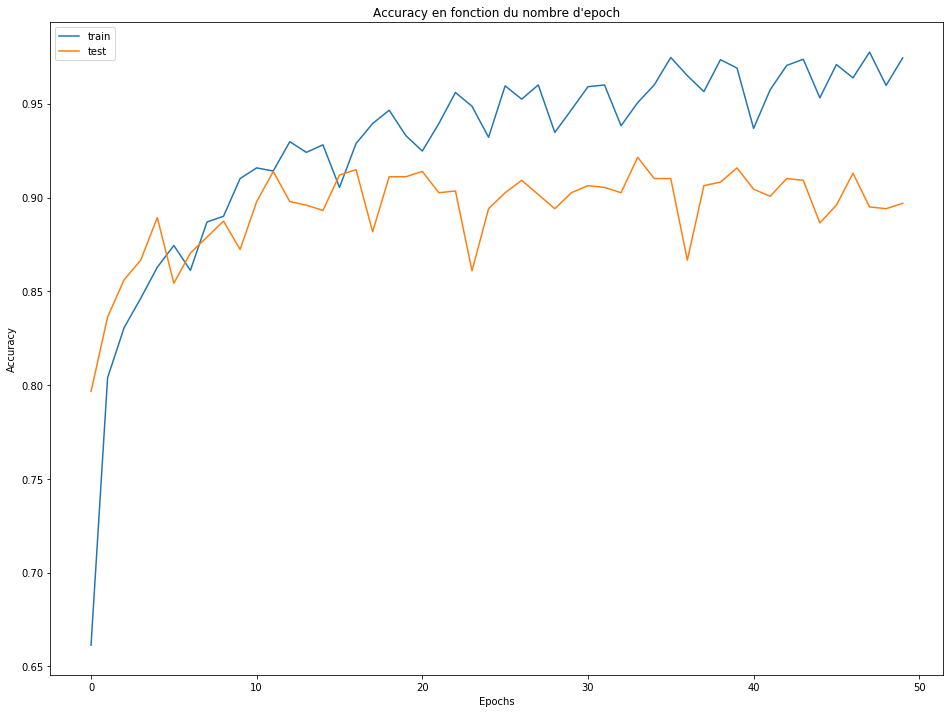

In [49]:
lenet=nn(0.1)
#seed(1)
tensorflow.random.set_seed(2)
#history=lenet.fit(X_train,Y_train,epochs=2,verbose=1)
history=lenet.fit(X_train,Y_train,validation_data=(X_test, Y_test),  epochs=50,verbose=0)


plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();
)

              precision    recall  f1-score   support

           0    0.97377   0.90549   0.93839       656
           1    0.57692   0.62500   0.60000        24
           2    0.88325   0.98305   0.93048       177
           3    0.76923   0.64103   0.69930        78
           4    0.52941   0.51429   0.52174        35
           5    0.65600   0.94253   0.77358        87

    accuracy                        0.88269      1057
   macro avg    0.73143   0.76856   0.74392      1057
weighted avg    0.89364   0.88269   0.88438      1057



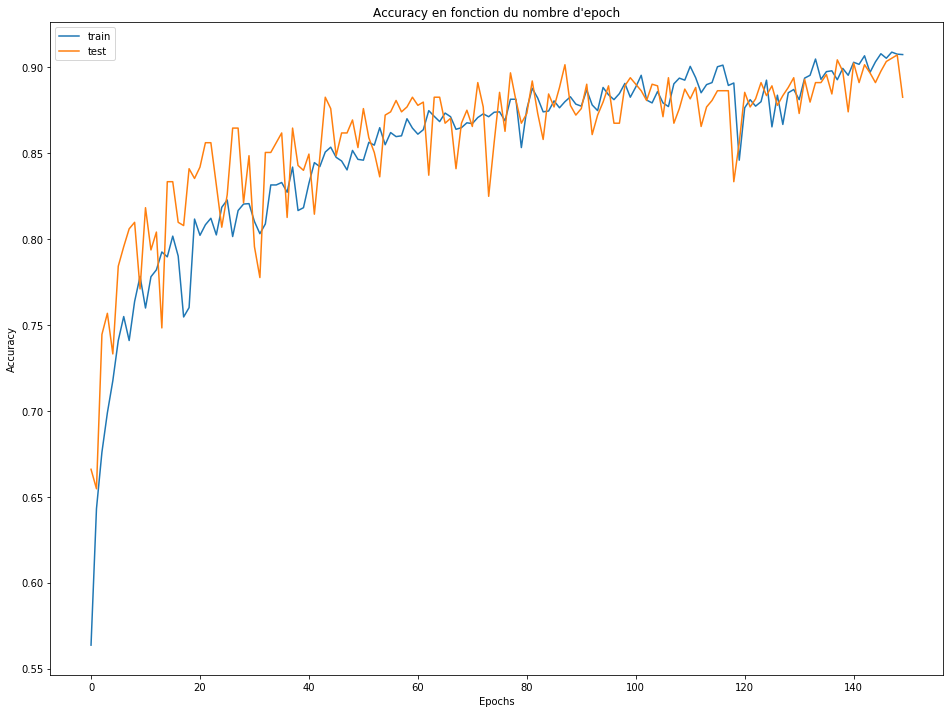

In [51]:
lenet=nn(0.5)
#seed(1)
tensorflow.random.set_seed(2)
#history=lenet.fit(X_train,Y_train,epochs=2,verbose=1)
history=lenet.fit(X_train,Y_train,validation_data=(X_test, Y_test),  epochs=150,verbose=0)


plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();

Y_predict=lenet.predict(X_test).argmax(axis=1)
print(metrics.classification_report(Y_predict,Y_test,digits=5))



              precision    recall  f1-score   support

           0    0.99180   0.90030   0.94384       672
           1    0.61538   0.94118   0.74419        17
           2    0.94416   0.91176   0.92768       204
           3    0.66154   0.86000   0.74783        50
           4    0.44118   0.88235   0.58824        17
           5    0.75200   0.96907   0.84685        97

    accuracy                        0.90728      1057
   macro avg    0.73434   0.91078   0.79977      1057
weighted avg    0.93007   0.90728   0.91362      1057



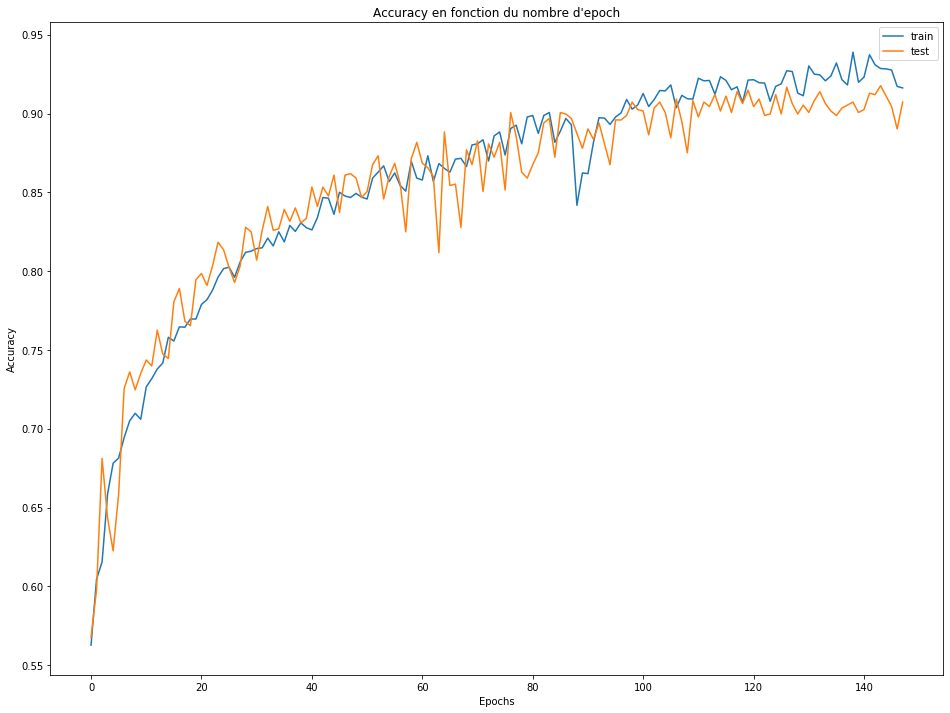

In [54]:
lenet=nn(0.5)
#seed(1)
tensorflow.random.set_seed(2)
#history=lenet.fit(X_train,Y_train,epochs=2,verbose=1)
history=lenet.fit(X_train,Y_train,validation_data=(X_test, Y_test),  epochs=148,verbose=0)


plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();

Y_predict=lenet.predict(X_test).argmax(axis=1)
print(metrics.classification_report(Y_predict,Y_test,digits=5))



[0.9701987, 0.9562441, 0.9666509, 0.96097445, 0.9694891, 0.97209084, 0.9517502]

              precision    recall  f1-score   support

           0    0.96066   0.93016   0.94516       630
           1    0.69231   0.81818   0.75000        22
           2    0.95939   0.96429   0.96183       196
           3    0.66154   0.81132   0.72881        53
           4    0.64706   0.56410   0.60274        39
           5    0.87200   0.93162   0.90083       117

    accuracy                        0.91485      1057
   macro avg    0.79883   0.83661   0.81490      1057
weighted avg    0.91845   0.91485   0.91580      1057



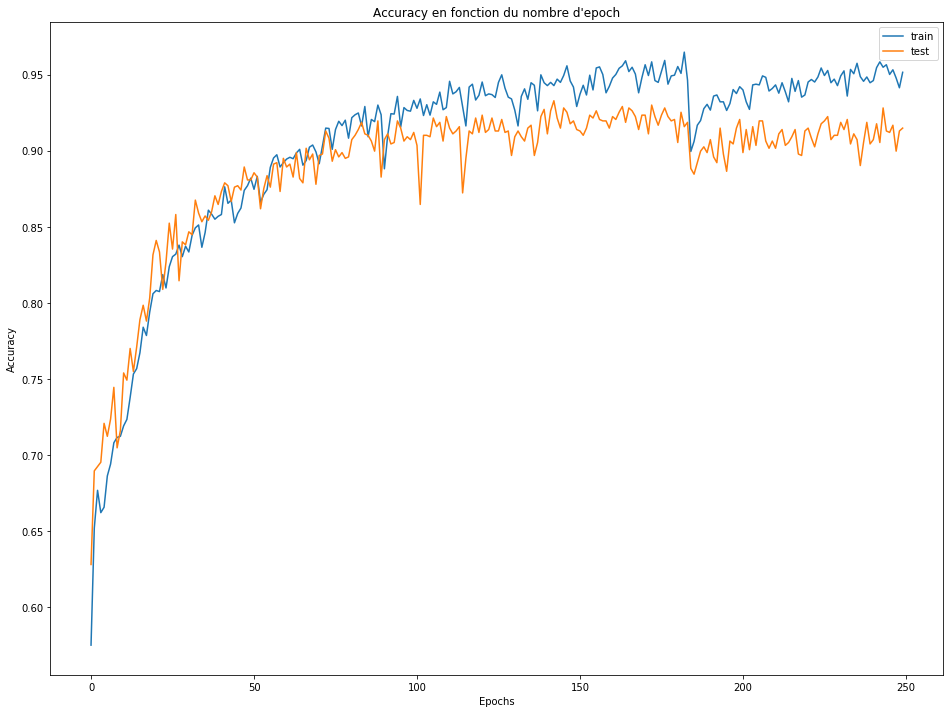

In [56]:
lenet=nn(0.5)
#seed(1)
tensorflow.random.set_seed(2)
#history=lenet.fit(X_train,Y_train,epochs=2,verbose=1)
history=lenet.fit(X_train,Y_train,validation_data=(X_test, Y_test),  epochs=250,verbose=0)


plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();

Y_predict=lenet.predict(X_test).argmax(axis=1)
print(metrics.classification_report(Y_predict,Y_test,digits=5))



              precision    recall  f1-score   support

       autre       0.96      0.90      0.93       650
   chevreuil       0.50      0.54      0.52        24
   corneille       0.92      0.93      0.93       196
      faisan       0.66      0.65      0.66        66
       lapin       0.47      0.70      0.56        23
      pigeon       0.69      0.88      0.77        98

    accuracy                           0.88      1057
   macro avg       0.70      0.77      0.73      1057
weighted avg       0.89      0.88      0.88      1057



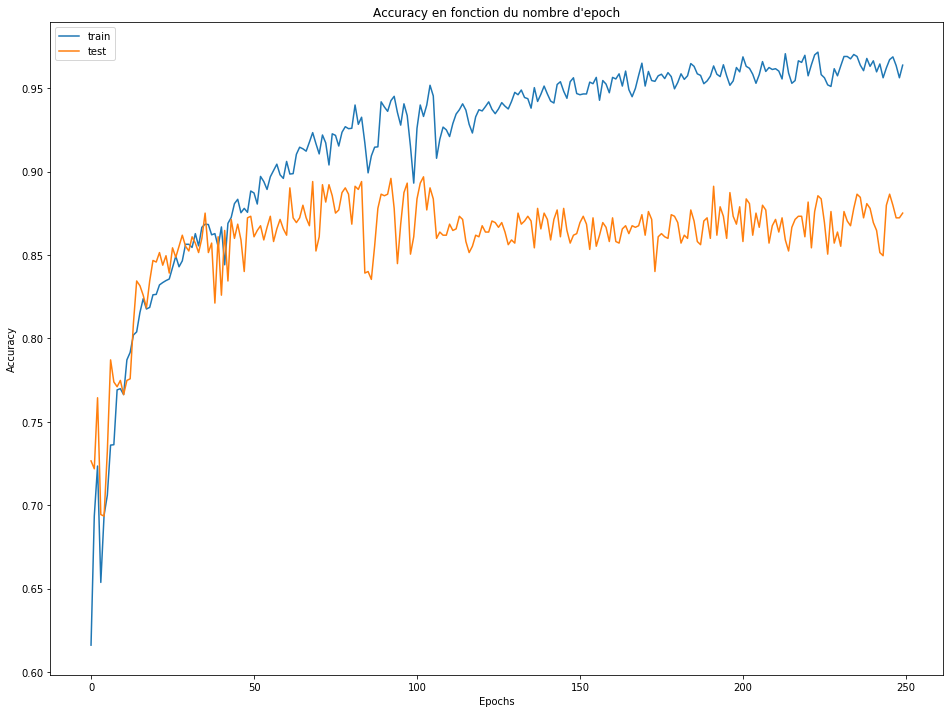

In [72]:
lenet=nn(0.3)
#seed(1)
tensorflow.random.set_seed(2)
#history=lenet.fit(X_train,Y_train,epochs=2,verbose=1)
history=lenet.fit(X_train,Y_train,validation_data=(X_test, Y_test),  epochs=250,verbose=0)


plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();

Y_predict=lenet.predict(X_test).argmax(axis=1)
print(metrics.classification_report(Y_predict,Y_test,digits=2,target_names=liste_animals))



In [2]:
lenet=nn(0.2)
#seed(1)
tensorflow.random.set_seed(2)
#history=lenet.fit(X_train,Y_train,epochs=2,verbose=1)
history=lenet.fit(X_train,Y_train,validation_data=(X_test, Y_test),  epochs=250,verbose=0)


plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();

Y_predict=lenet.predict(X_test).argmax(axis=1)
print(metrics.classification_report(Y_predict,Y_test,digits=2,target_names=liste_animals))



NameError: name 'nn' is not defined

In [59]:
lenet=nn(0.4)
#seed(1)
tensorflow.random.set_seed(2)
#history=lenet.fit(X_train,Y_train,epochs=2,verbose=1)
history=lenet.fit(X_train,Y_train,validation_data=(X_test, Y_test),  epochs=250,verbose=0)


plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();

Y_predict=lenet.predict(X_test).argmax(axis=1)
print(metrics.classification_report(Y_predict,Y_test,digits=2,target_names=liste_animals))



In [ ]:
lenet=nn(0.6)
#seed(1)
tensorflow.random.set_seed(2)
#history=lenet.fit(X_train,Y_train,epochs=2,verbose=1)
history=lenet.fit(X_train,Y_train,validation_data=(X_test, Y_test),  epochs=250,verbose=0)


plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();

Y_predict=lenet.predict(X_test).argmax(axis=1)
print(metrics.classification_report(Y_predict,Y_test,digits=2,target_names=liste_animals))



In [ ]:
lenet=nn(0.7)
#seed(1)
tensorflow.random.set_seed(2)
#history=lenet.fit(X_train,Y_train,epochs=2,verbose=1)
history=lenet.fit(X_train,Y_train,validation_data=(X_test, Y_test),  epochs=250,verbose=0)


plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();

Y_predict=lenet.predict(X_test).argmax(axis=1)
print(metrics.classification_report(Y_predict,Y_test,digits=2,target_names=liste_animals))

